In [1]:
%load_ext autoreload
%autoreload 2

from random import randint
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import plotly.express as px

def read_csv(loc, date=True):
    df = pd.read_csv(loc)
    if date:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    return df


def dic_read(loc):
    a_file = open(loc, "rb")
    output = pickle.load(a_file)
    return output


def set_seed(seed_value=123):
    import os
    import random
    import tensorflow as tf
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    np.random.seed(seed_value)
    random.seed(seed_value)
    tf.random.set_seed(seed_value)
    from keras import backend as K
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)
    K.set_session(sess)


def random_sampling(dataset, n_sample, window):
    '''
    implicitly assuming there is no calendar effect.
    :param dataset: np.ndarray
    :param n_sample:
    :param window:
    :return:
    '''
    isinstance(dataset, np.ndarray)
    step = 0
    res = []
    while step < n_sample:
        step += 1
        randidx = randint(0, dataset.shape[0] - window)
        res.append(dataset[randidx:window + randidx])
    # label as real data
    # label = np.ones(n_sample)
    # return np.array(res), label
    return np.array(res)


set_seed()

hfd = read_csv('../cleaned_data/hfd.csv')
factor_etf_data = read_csv('../cleaned_data/factor_etf_data.csv')
hfd_fullname = dic_read('../cleaned_data/hfd_fullname.pkl')
factor_etf_name = dic_read('../cleaned_data/factor_etf_name.pkl')
rf = read_csv('../cleaned_data/rf.csv')

all_data_name = {**factor_etf_name, **hfd_fullname}

# dataset = factor_etf_data.join(hfd).join(rf)
dataset = factor_etf_data.join(hfd)
data_scaler = MinMaxScaler()
data = data_scaler.fit_transform(dataset)

dataset = random_sampling(data, 2000, 48)

In [2]:
dataset.shape

(2000, 48, 35)

In [3]:
from tensorflow import keras
#load trained model under root ./trained_generator
import glob
import os
path='D:\\Cambridge_dissertation\\GAN\\trained_generator\\old'
all_file=glob.glob(os.path.join(path,'*.h5'))

model_name=[]
generated_data = []
for filename in all_file:
    model=keras.models.load_model(filename)
    noise = np.random.normal(0, 1, (1000, 48, 35))
    generated_data.append(model.predict(noise))
    # model_name.append(filename[48:-20])
    model_name.append(filename[48+4:-20])

32/32 [==============================] - 1s 10ms/step


In [4]:
# add benchmark
generated_data.append(random_sampling(data,1000,48))
model_name.append('Random_Sampling')

In [5]:
generated_data[0].shape

(1000, 48, 35)

In [6]:
isinstance(generated_data[0],np.ndarray)

True

In [7]:
generated_data[-1].shape

(1000, 48, 35)

In [8]:
dataset[:1000].shape

(1000, 48, 35)

1 out of 45 done.
2 out of 45 done.
3 out of 45 done.
4 out of 45 done.
34 out of 45 done.
35 out of 45 done.
36 out of 45 done.
37 out of 45 done.
38 out of 45 done.
39 out of 45 done.
41 out of 45 done.
45 out of 45 done.


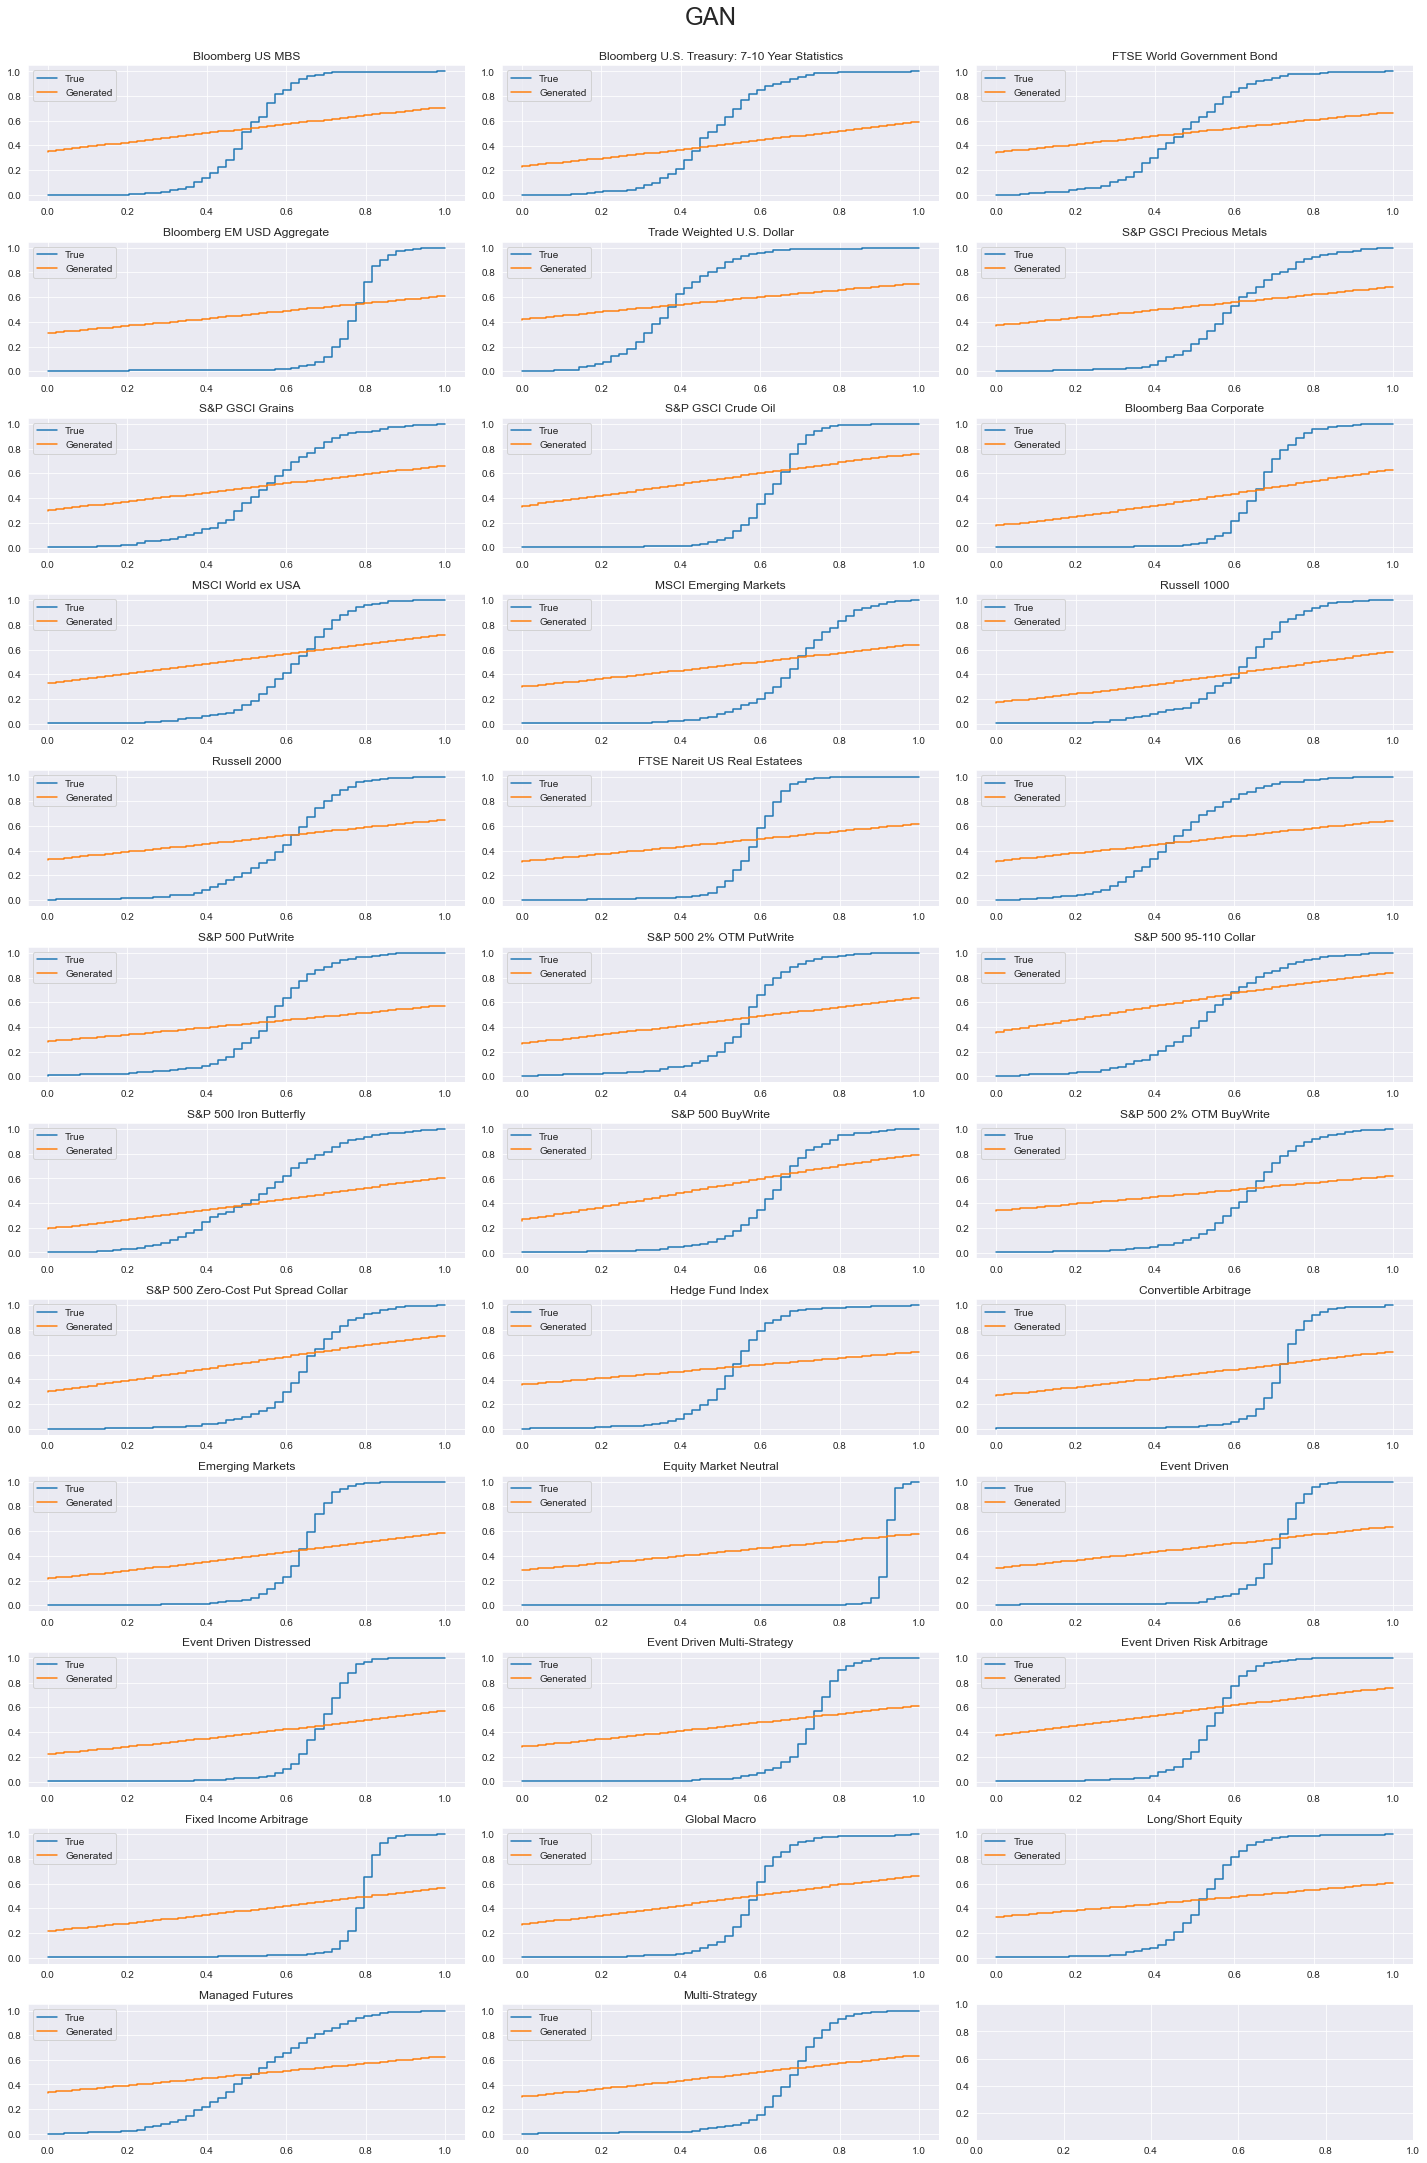

1 out of 45 done.
2 out of 45 done.
3 out of 45 done.
4 out of 45 done.
34 out of 45 done.
35 out of 45 done.
36 out of 45 done.
37 out of 45 done.
38 out of 45 done.
39 out of 45 done.
41 out of 45 done.
45 out of 45 done.


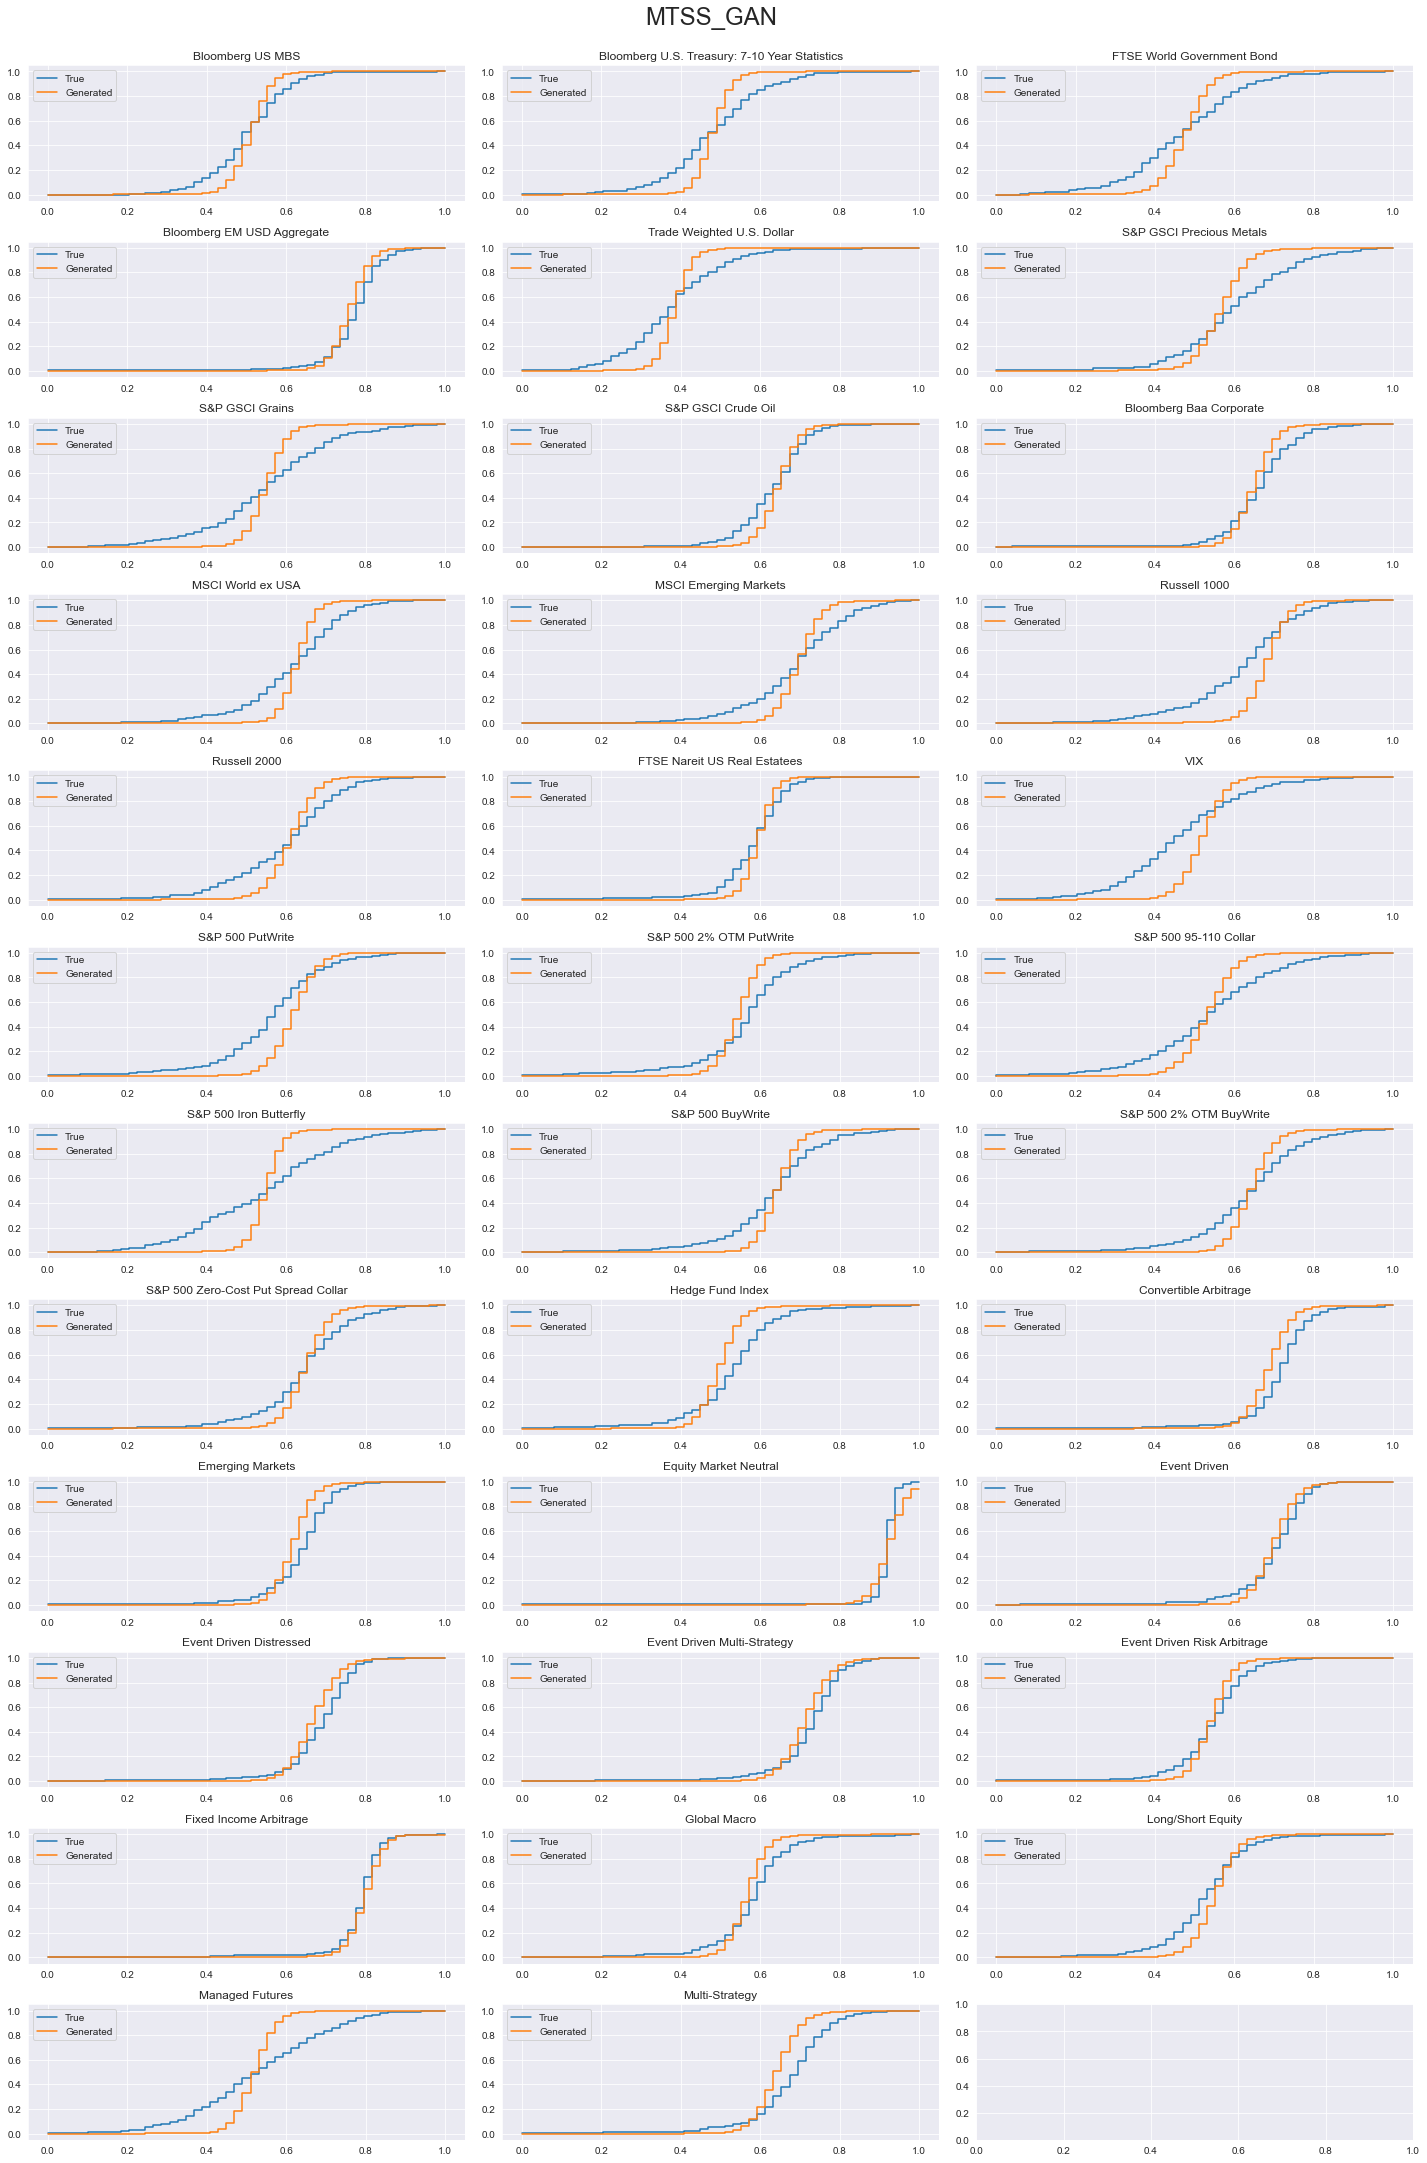

1 out of 45 done.
2 out of 45 done.
3 out of 45 done.
4 out of 45 done.
34 out of 45 done.
35 out of 45 done.
36 out of 45 done.
37 out of 45 done.
38 out of 45 done.
39 out of 45 done.
41 out of 45 done.
45 out of 45 done.


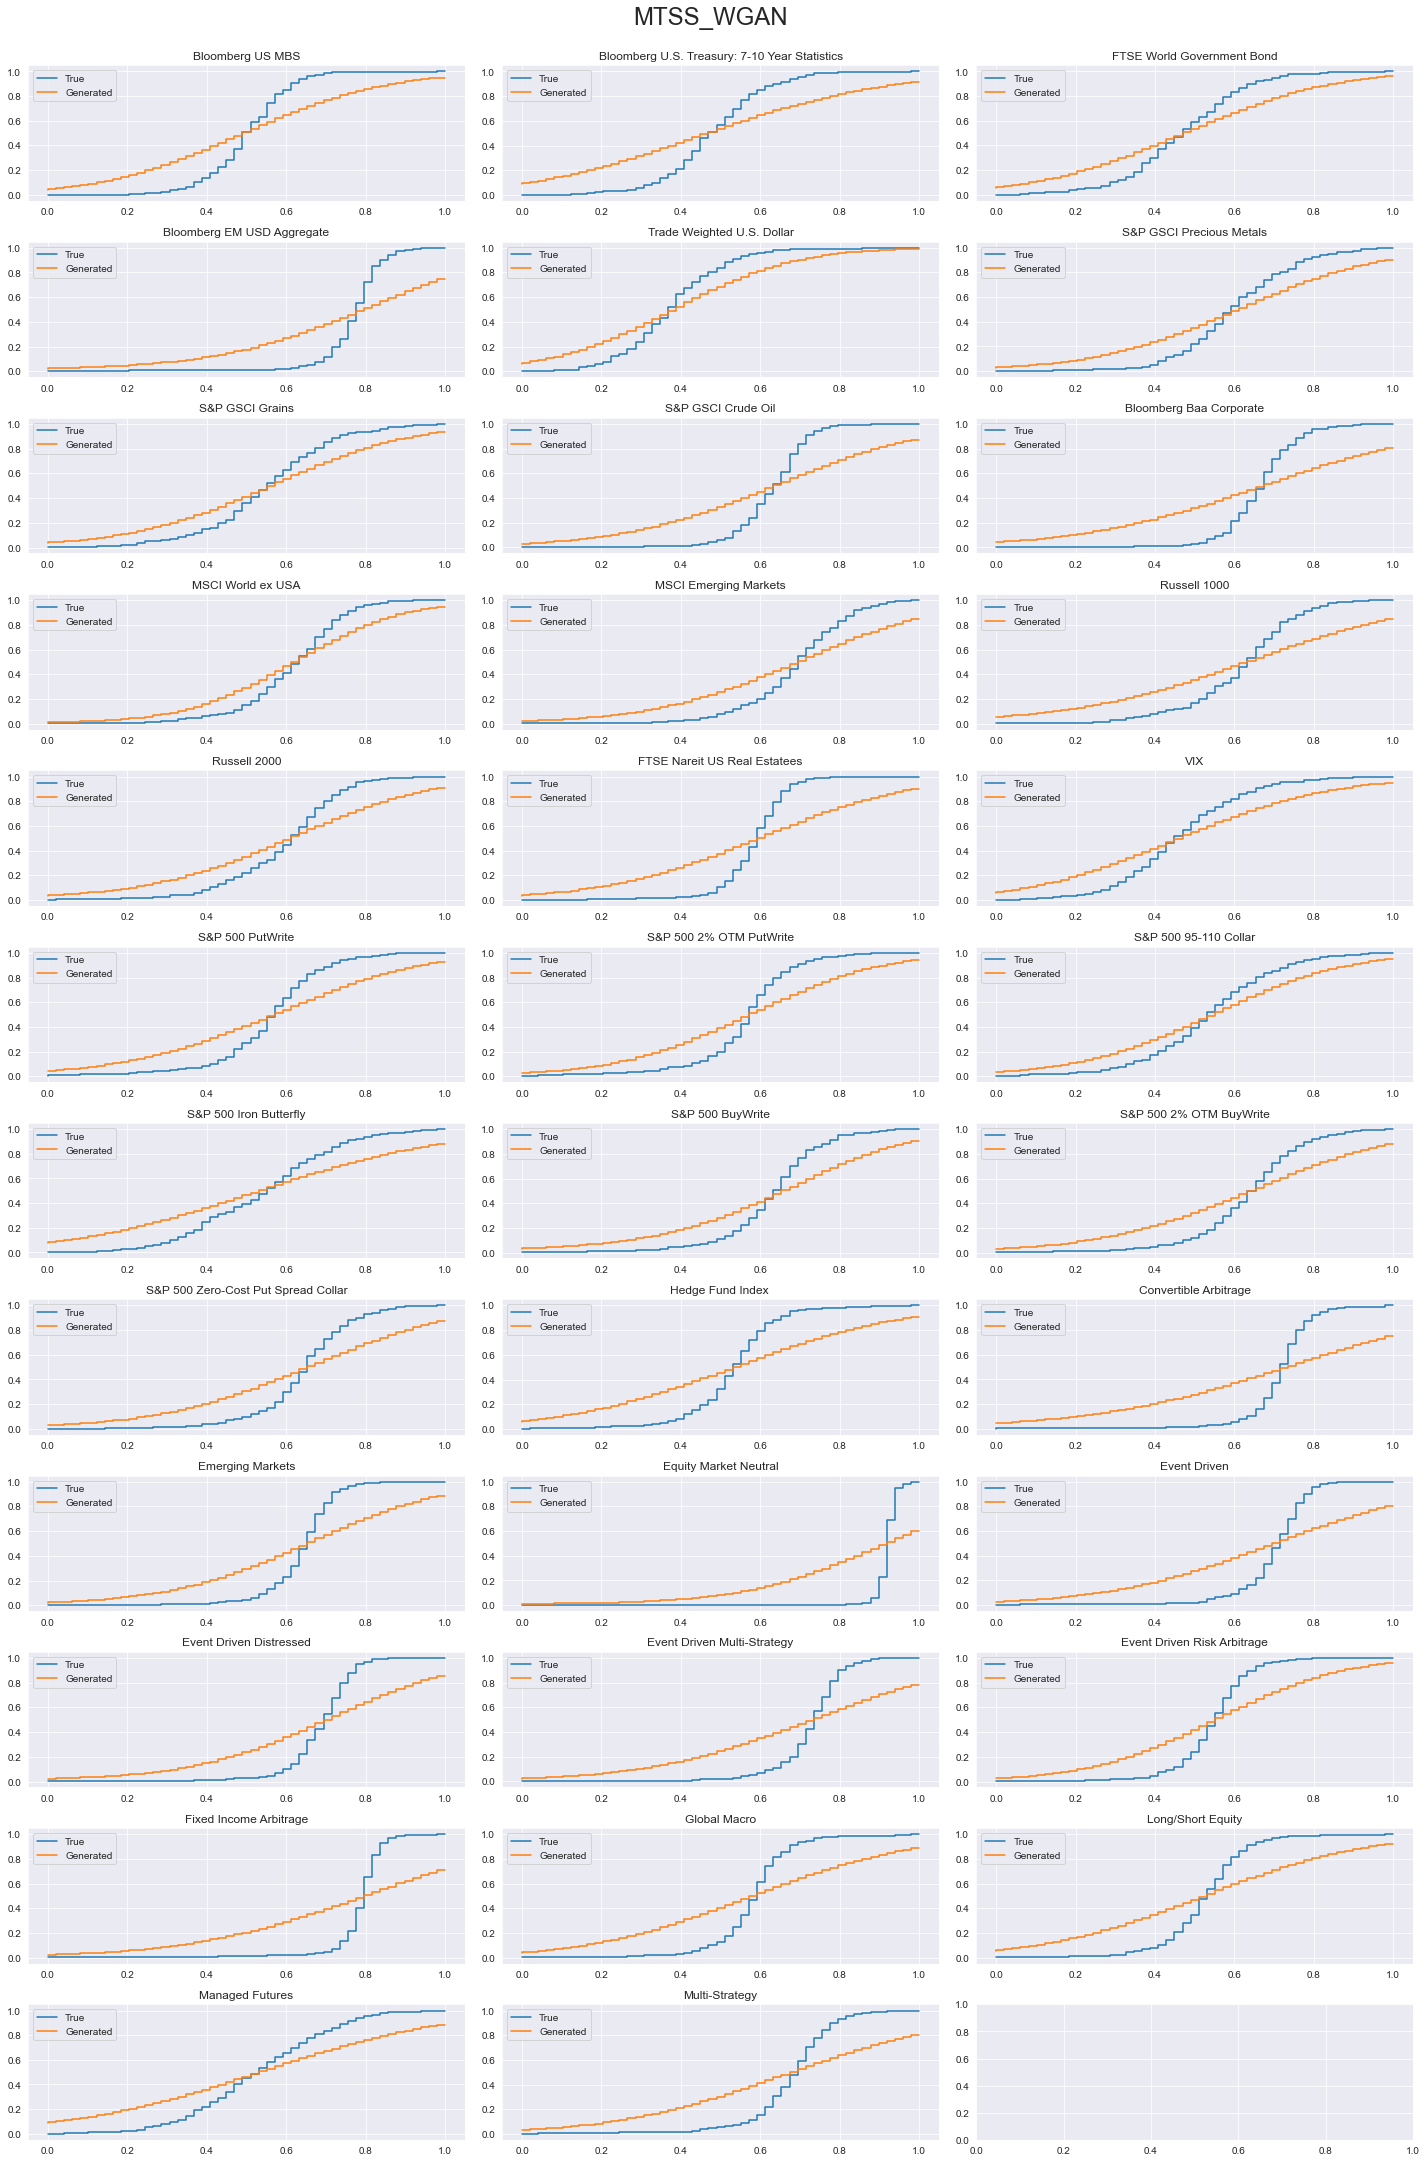

1 out of 45 done.
2 out of 45 done.
3 out of 45 done.
4 out of 45 done.
34 out of 45 done.
35 out of 45 done.
36 out of 45 done.
37 out of 45 done.
38 out of 45 done.
39 out of 45 done.
41 out of 45 done.
45 out of 45 done.


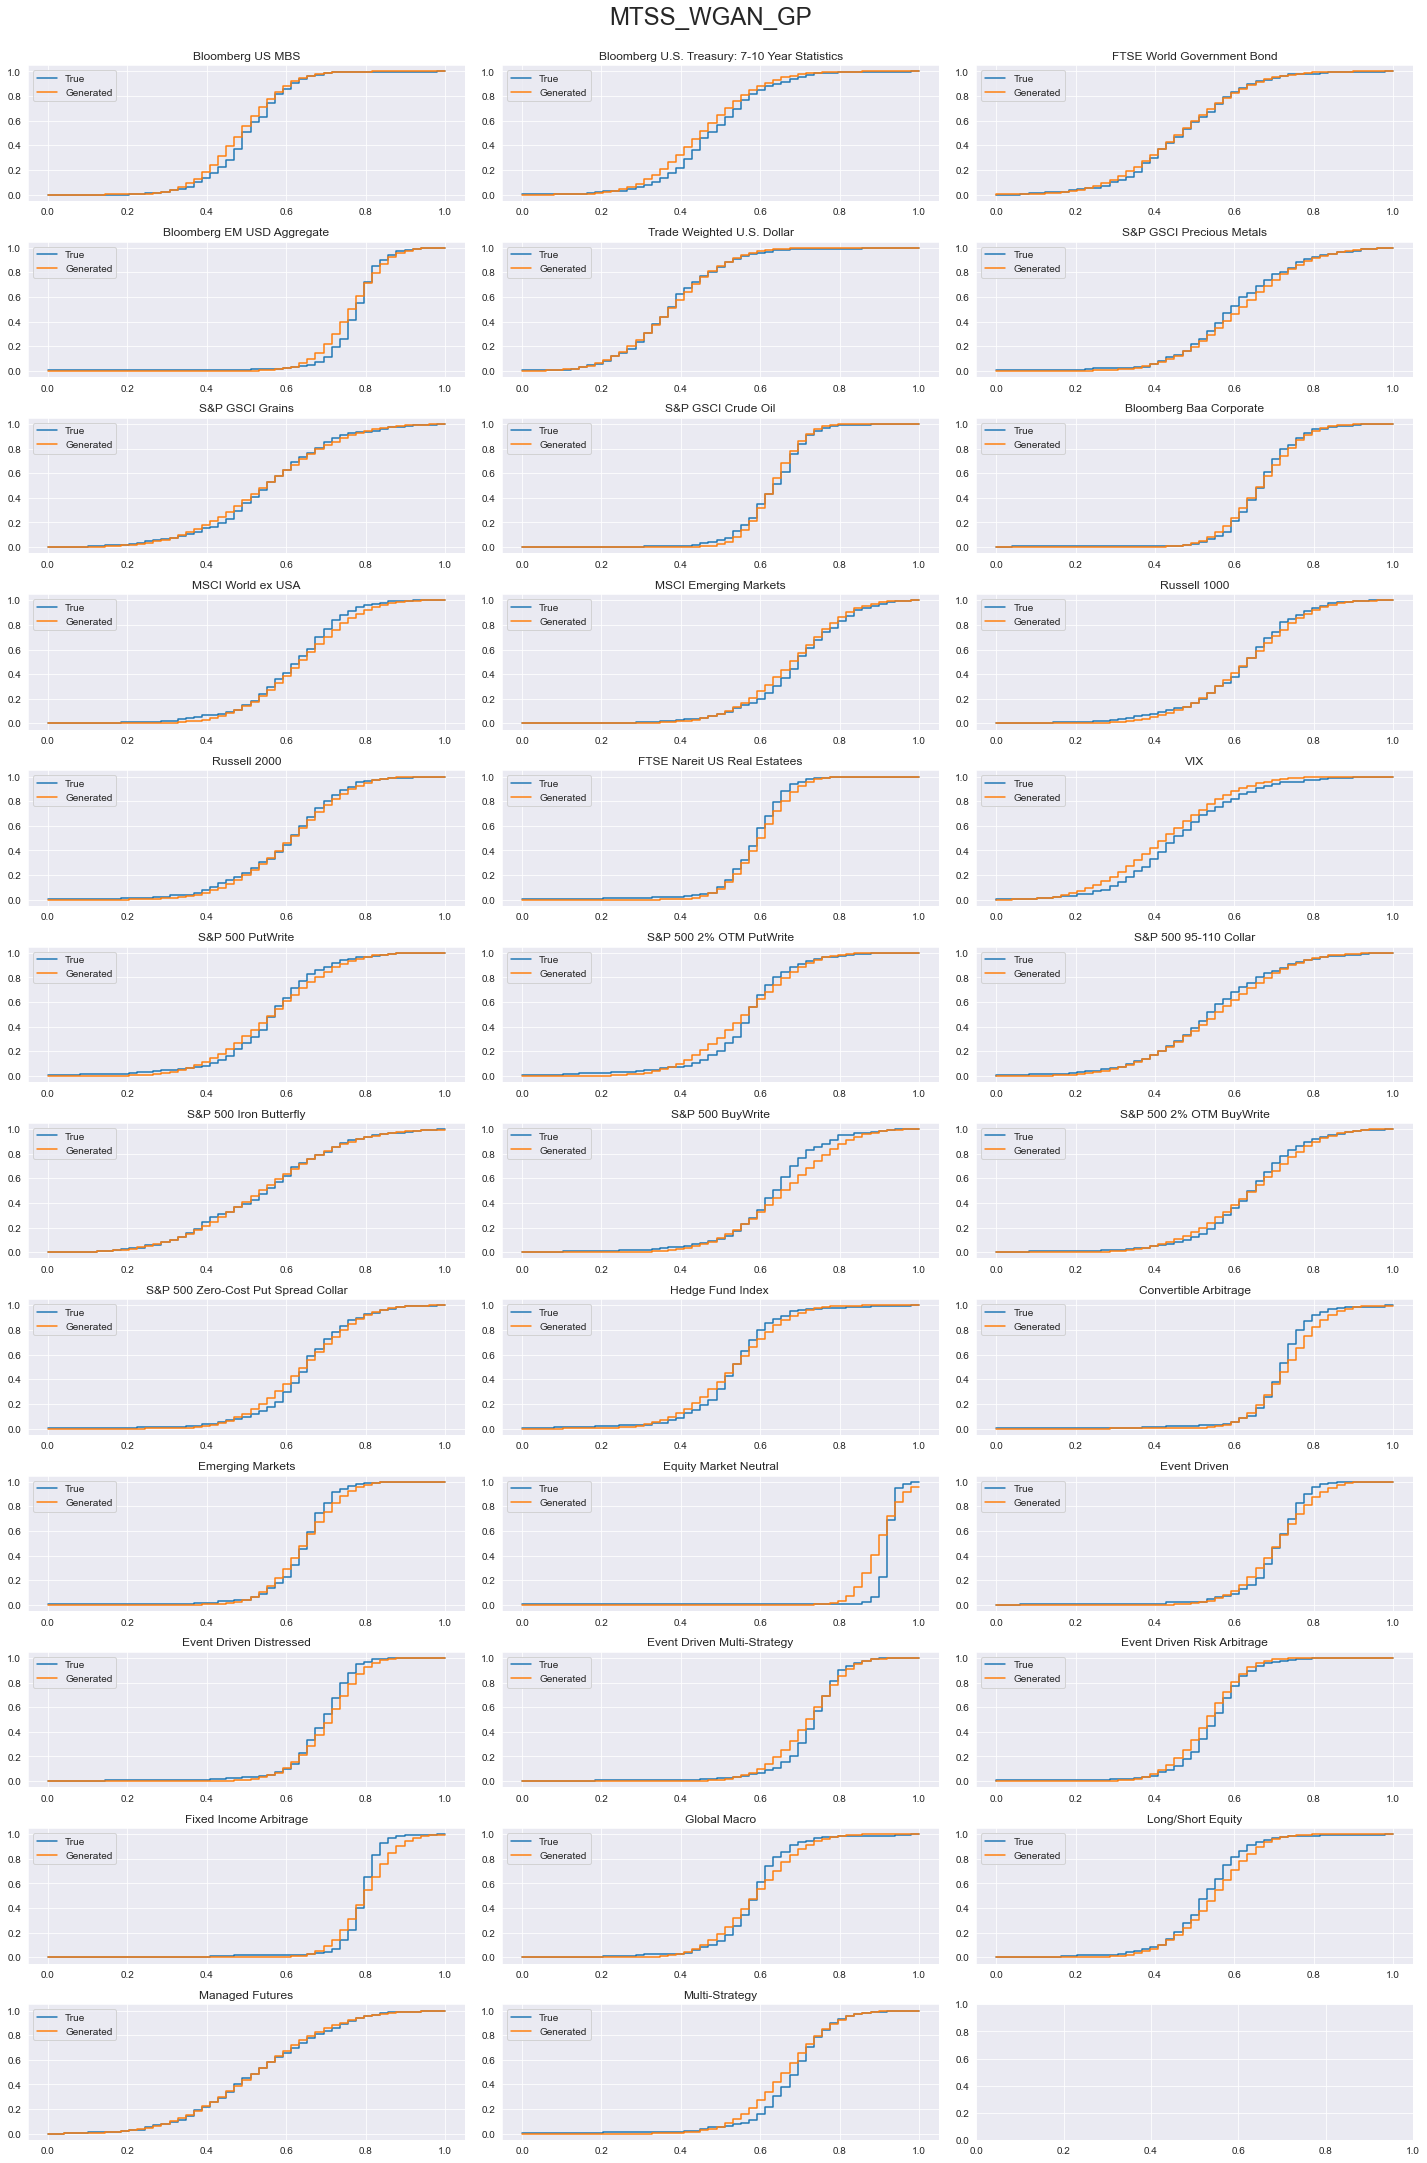

1 out of 45 done.
2 out of 45 done.
3 out of 45 done.
4 out of 45 done.
34 out of 45 done.
35 out of 45 done.
36 out of 45 done.
37 out of 45 done.
38 out of 45 done.
39 out of 45 done.
41 out of 45 done.
45 out of 45 done.


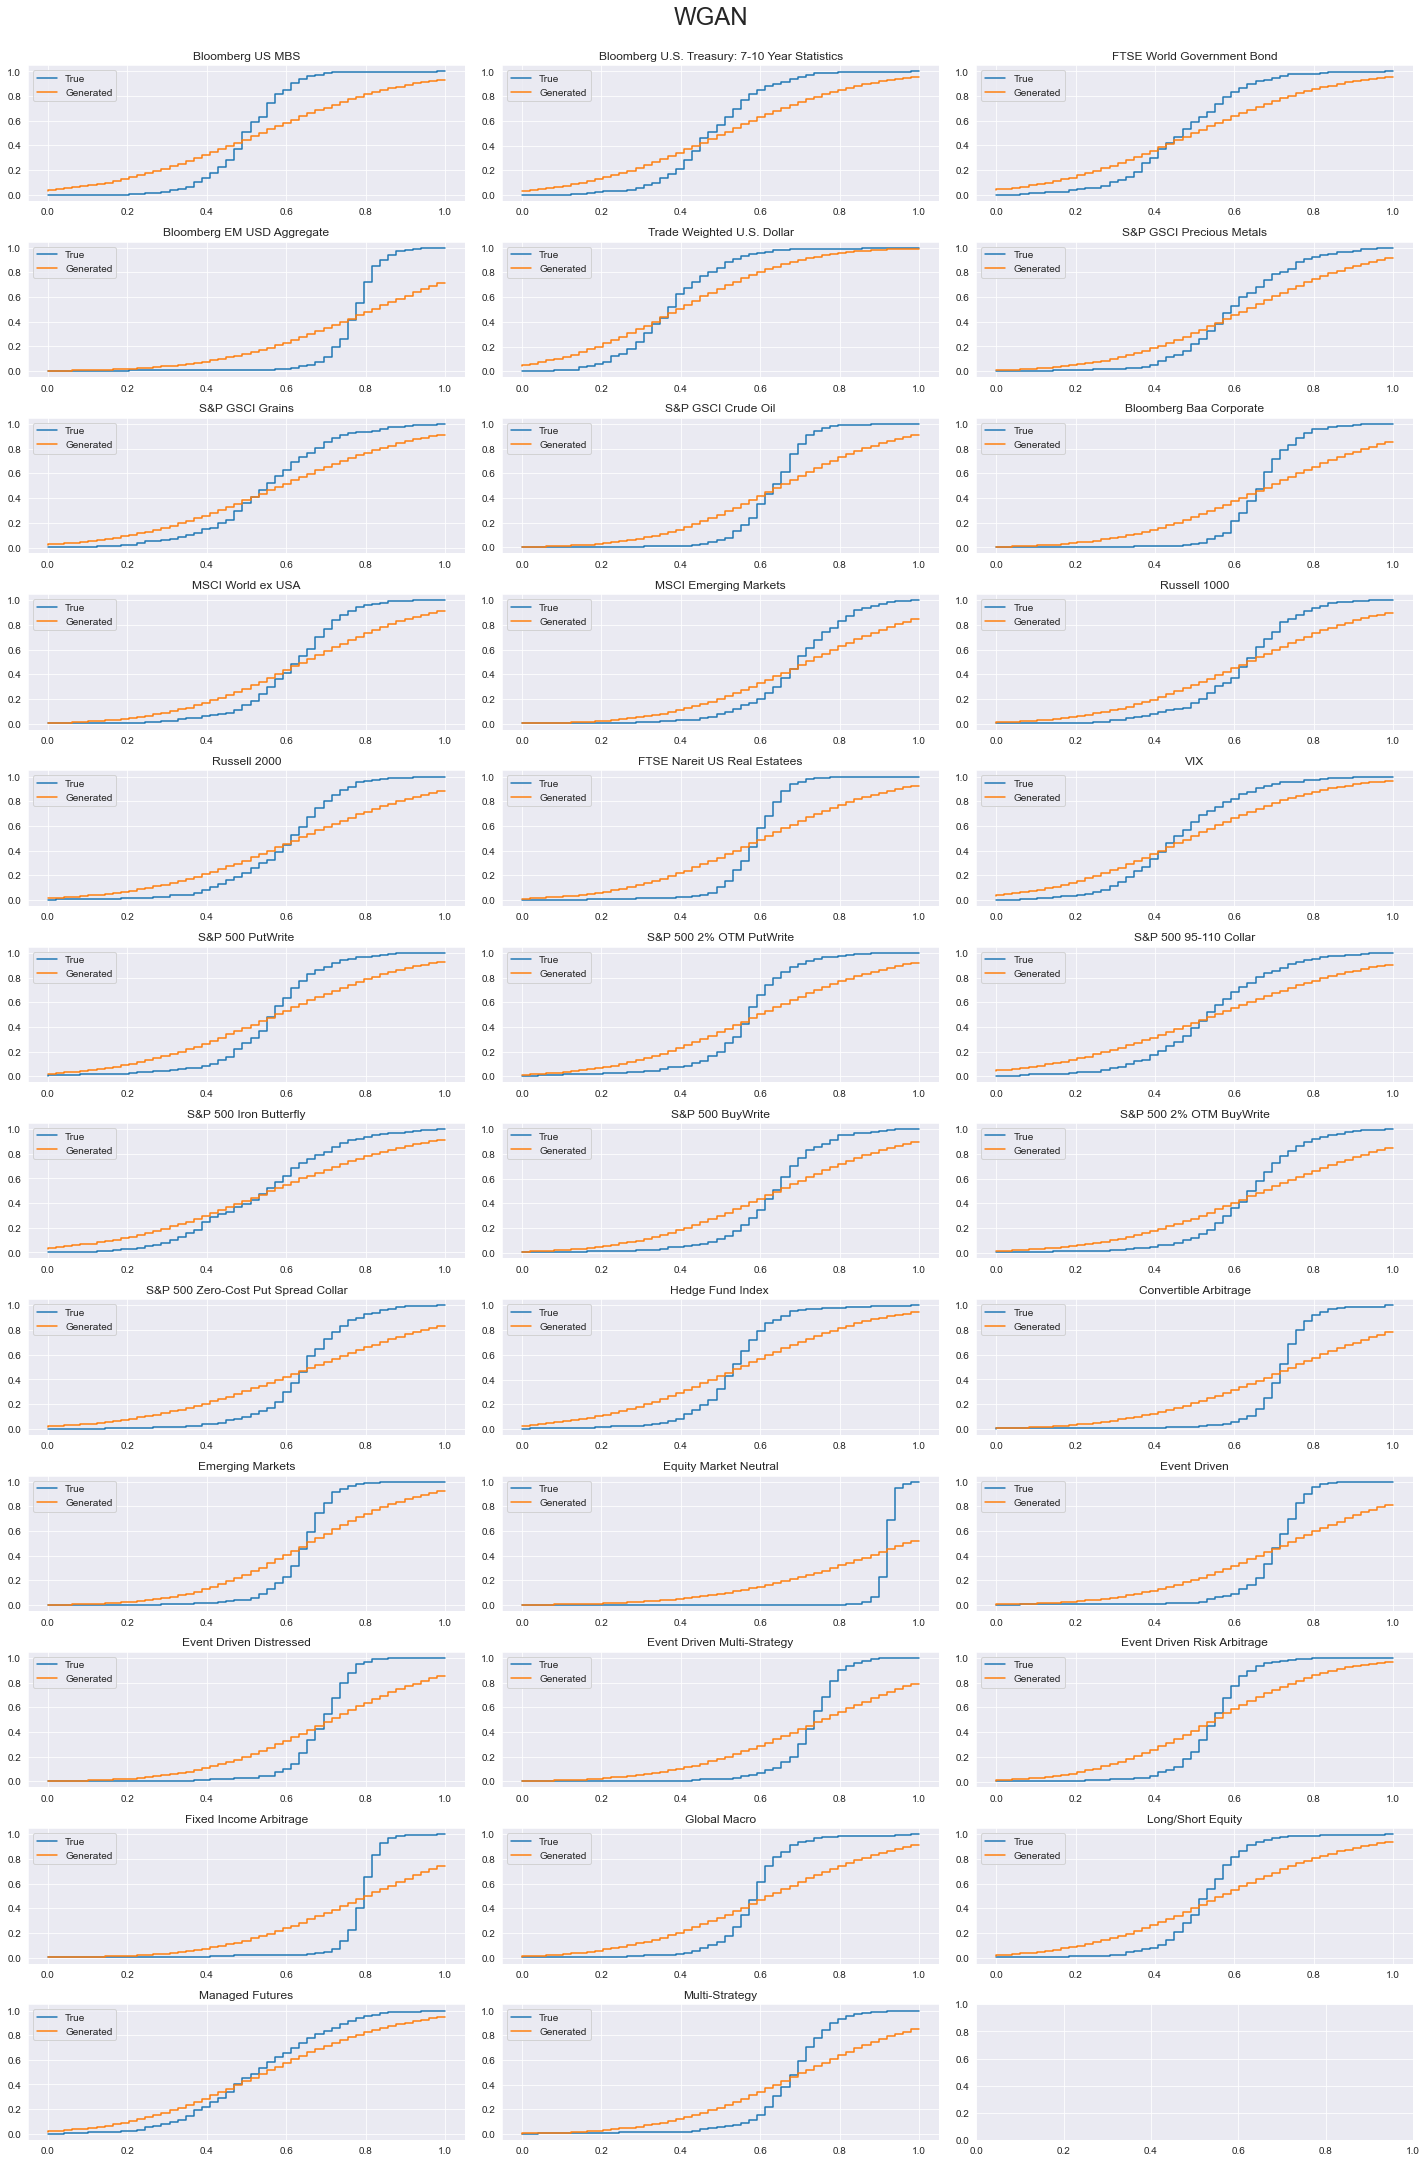

1 out of 45 done.
2 out of 45 done.
3 out of 45 done.
4 out of 45 done.
34 out of 45 done.
35 out of 45 done.
36 out of 45 done.
37 out of 45 done.
38 out of 45 done.
39 out of 45 done.
41 out of 45 done.
45 out of 45 done.


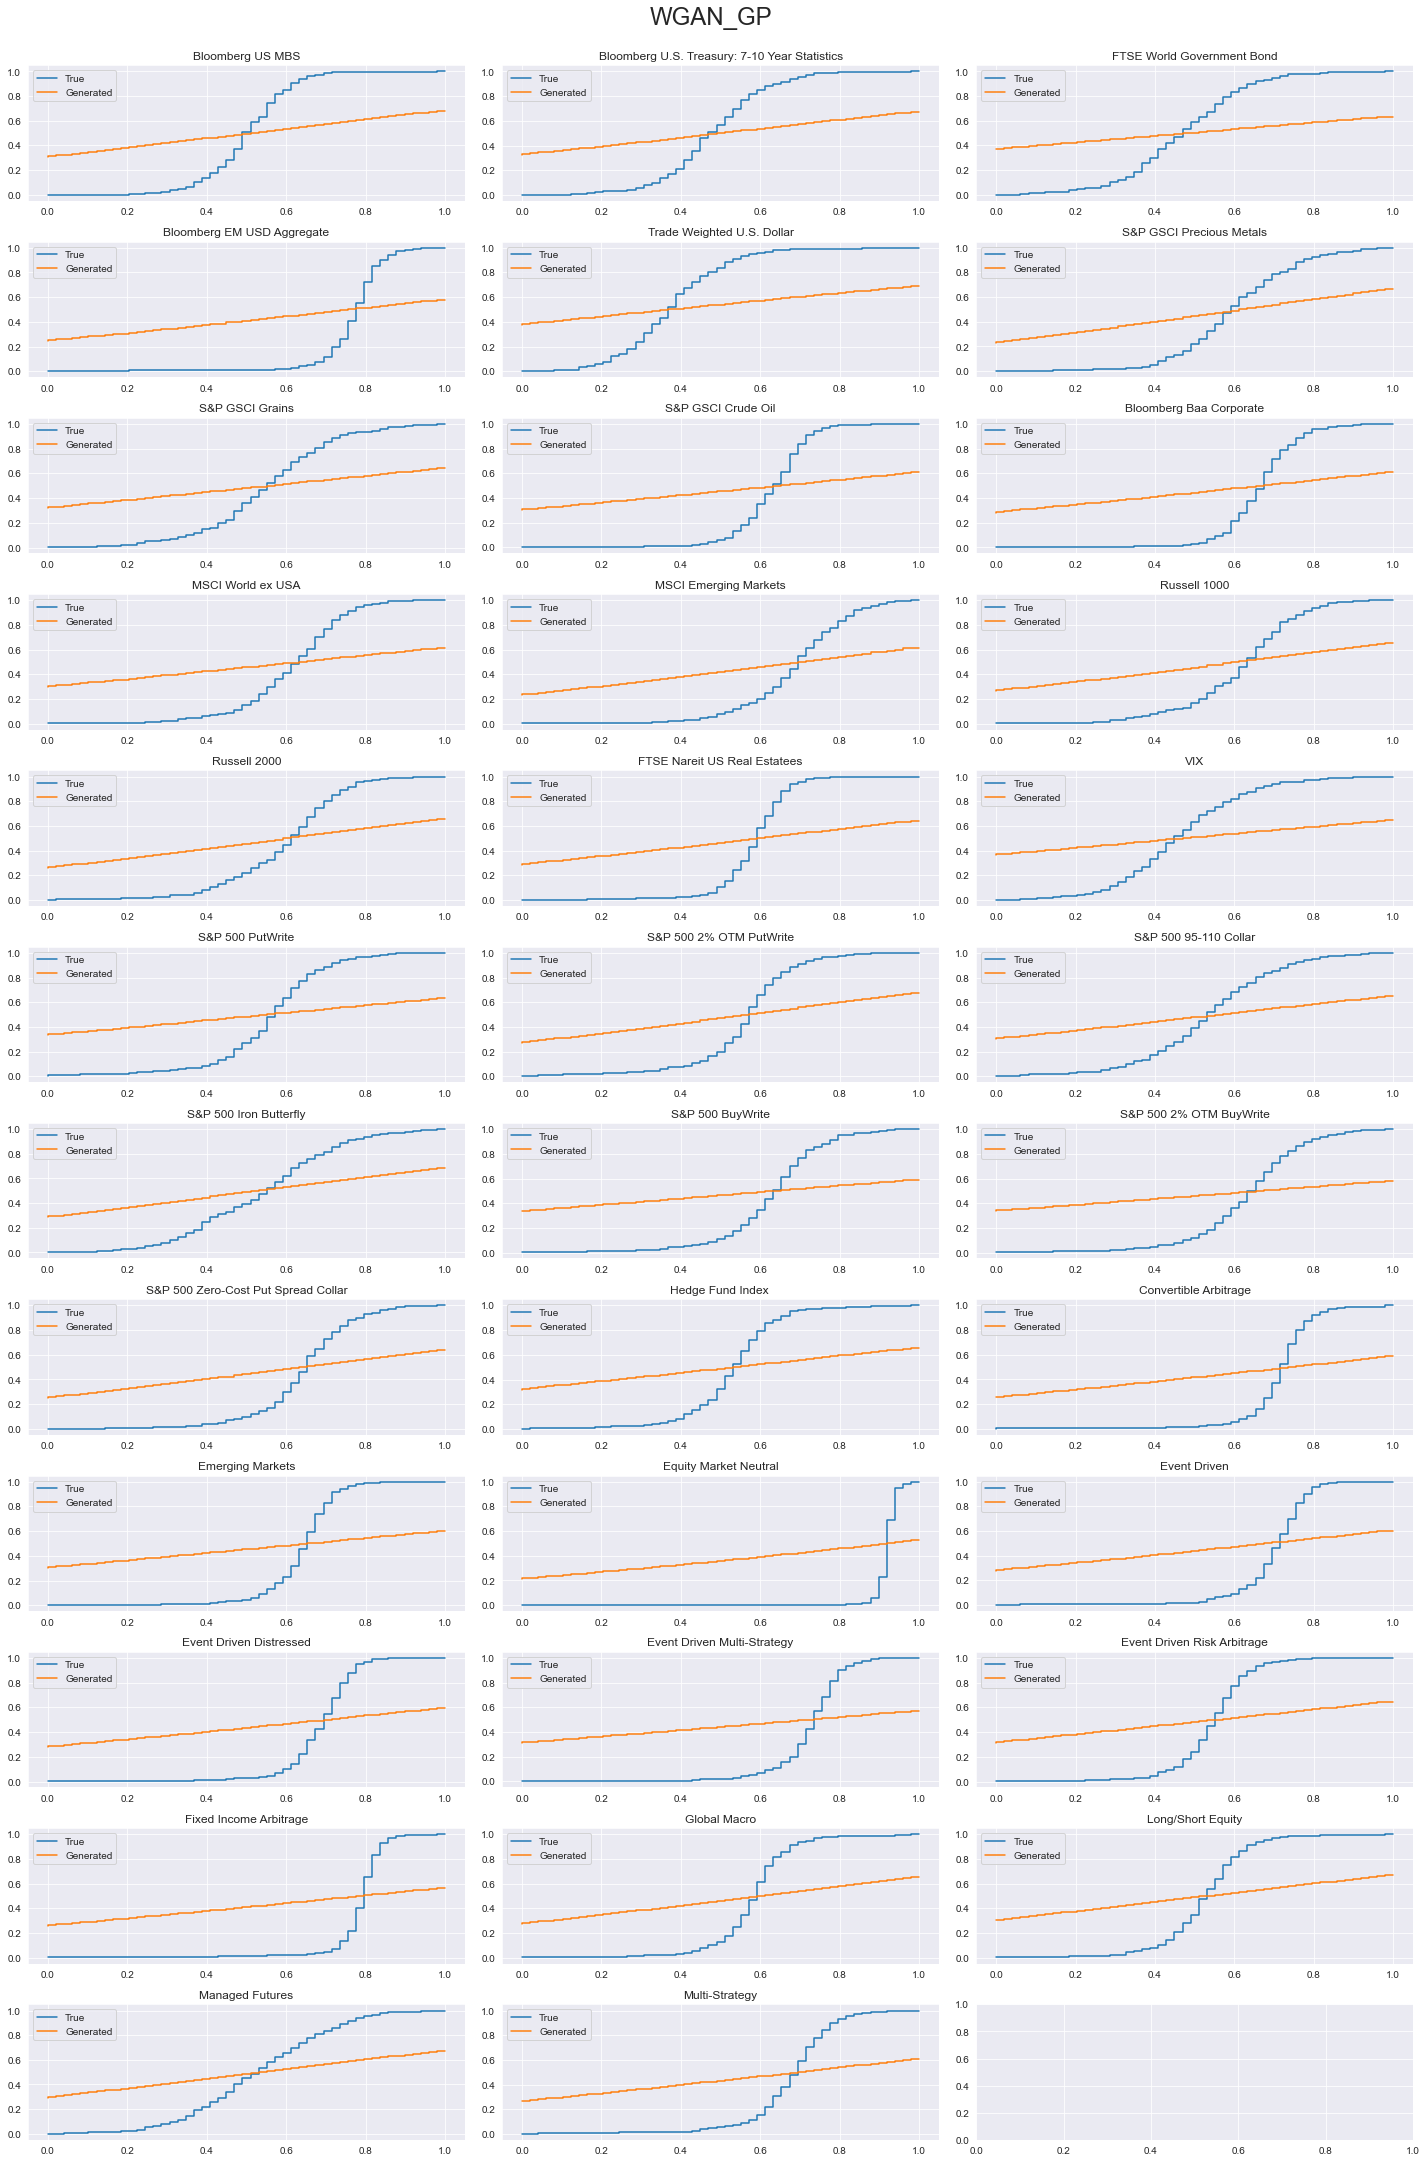

1 out of 45 done.
2 out of 45 done.
3 out of 45 done.
4 out of 45 done.
34 out of 45 done.
35 out of 45 done.
36 out of 45 done.
37 out of 45 done.
38 out of 45 done.
39 out of 45 done.
41 out of 45 done.
45 out of 45 done.


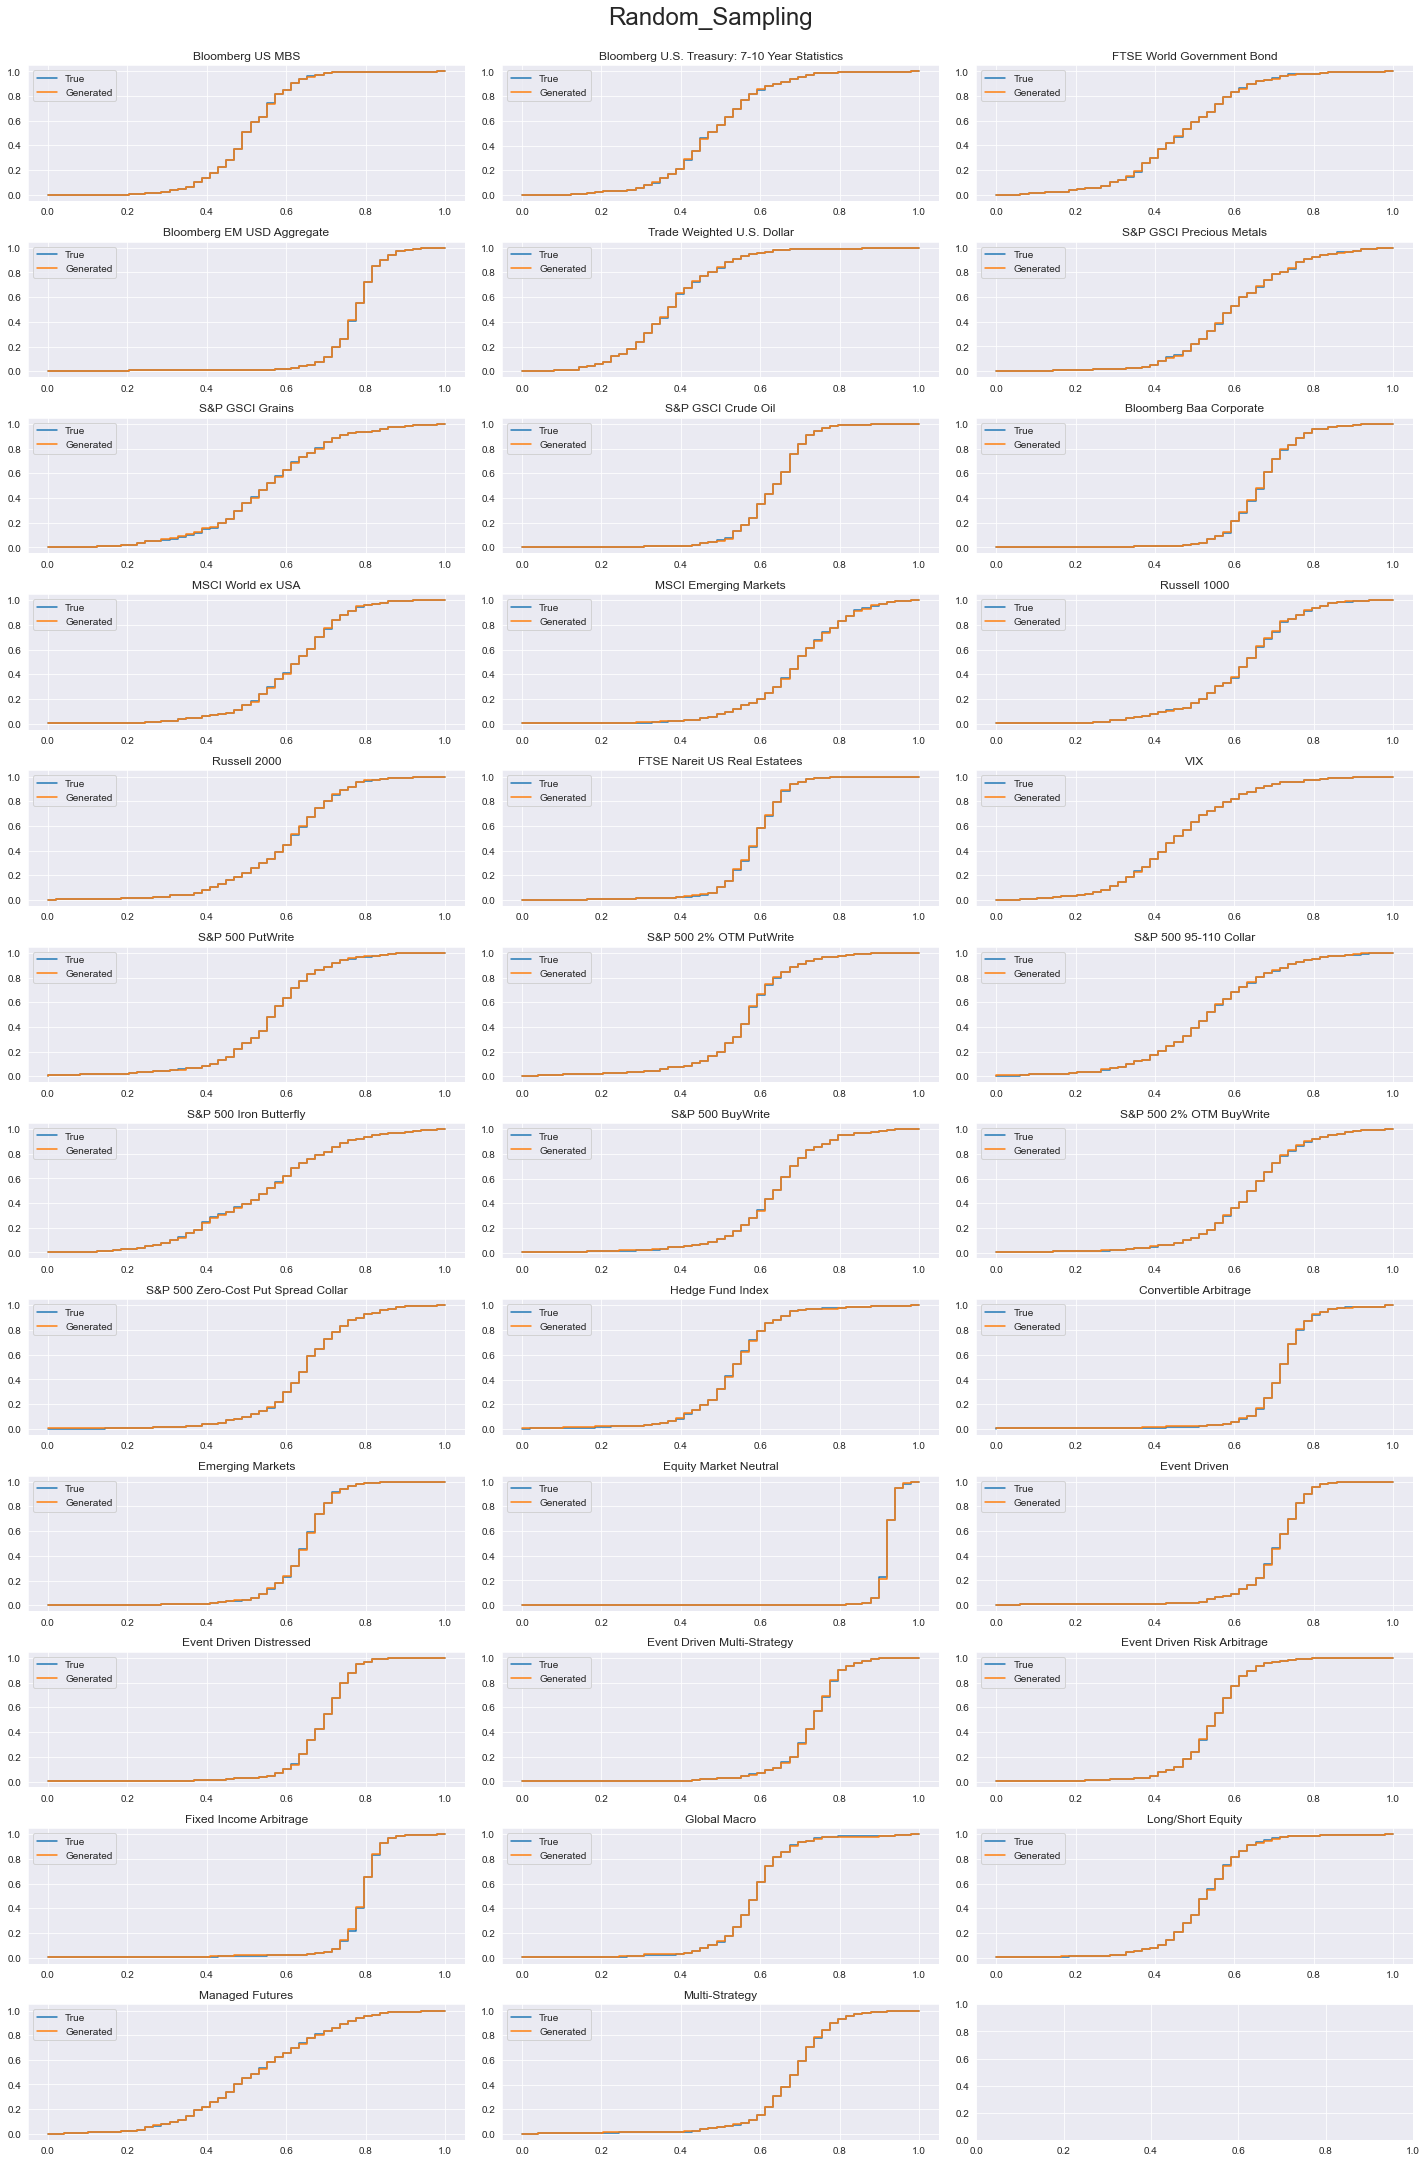

In [9]:
from GAN_eval import GAN_eval

subplot_title = list(all_data_name.values())
# subplot_title.append('RF')
res=[]
ks= []
for i in range(len(model_name)):
    evaluation = GAN_eval(dataset[:1000],generated_data[i],dataset[1000:],subplot_title=subplot_title,model_name=[model_name[i]])
    res.append(evaluation.run_all())
    ks.append(evaluation.ks_test())

In [10]:
len(res)

7

In [11]:
gan_metrics = round(pd.concat(res,axis=1),5)

In [12]:
gan_metrics

GAN  MTSS_GAN  MTSS_WGAN  MTSS_WGAN_GP      WGAN  \
ACF                 0.03331   0.04099    0.03614       0.03291   0.03313   
FID                35.43537   0.29806    2.50542       0.02148   1.31452   
Inception_score    58.90521   1.66310   30.09984       1.66644  11.57273   
R2_relative_error   0.00000   0.00000    0.00000       0.00000   0.00000   
gaussian_MMD        0.99235   0.03591    0.02800       0.01314   0.07485   
js_div              0.62034   0.10182    0.54656       0.10506   0.42947   
kl_div              4.07593   0.50868    3.40452       0.51069   2.44865   
ks_test             0.00000   0.00000    0.00000       0.00000   0.00000   
linear_MMD          0.72561   0.01815    0.00035       0.00660   0.03833   
lp_dist             0.00490   0.00060    0.00165       0.00074   0.00140   
poly_MMD           19.43670   0.50598    0.06100       0.18601   2.13369   
wasserstein         0.77855   0.05207    0.17486       0.01904   0.14181   

                    WGAN_GP  Random_Sampling  
ACF                 0.03314          0.00431  
FID                39.75192          0.00011  
Inception_score    59.46848          1.95933  
R2_relative_error   0.00000          0.00000  
gaussian_MMD        0.00861          0.00003  
js_div              0.62111          0.13317  
kl_div              4.08545          0.67260  
ks_test             0.00000          0.58261  
linear_MMD          0.00361          0.00002  
lp_dist             0.00519          0.00076  
poly_MMD            0.10168          0.00059  
wasserstein         0.82601          0.00095

In [13]:
px.bar(gan_metrics)

In [14]:
gan_metrics

GAN  MTSS_GAN  MTSS_WGAN  MTSS_WGAN_GP      WGAN  \
ACF                 0.03331   0.04099    0.03614       0.03291   0.03313   
FID                35.43537   0.29806    2.50542       0.02148   1.31452   
Inception_score    58.90521   1.66310   30.09984       1.66644  11.57273   
R2_relative_error   0.00000   0.00000    0.00000       0.00000   0.00000   
gaussian_MMD        0.99235   0.03591    0.02800       0.01314   0.07485   
js_div              0.62034   0.10182    0.54656       0.10506   0.42947   
kl_div              4.07593   0.50868    3.40452       0.51069   2.44865   
ks_test             0.00000   0.00000    0.00000       0.00000   0.00000   
linear_MMD          0.72561   0.01815    0.00035       0.00660   0.03833   
lp_dist             0.00490   0.00060    0.00165       0.00074   0.00140   
poly_MMD           19.43670   0.50598    0.06100       0.18601   2.13369   
wasserstein         0.77855   0.05207    0.17486       0.01904   0.14181   

                    WGAN_GP  Random_Sampling  
ACF                 0.03314          0.00431  
FID                39.75192          0.00011  
Inception_score    59.46848          1.95933  
R2_relative_error   0.00000          0.00000  
gaussian_MMD        0.00861          0.00003  
js_div              0.62111          0.13317  
kl_div              4.08545          0.67260  
ks_test             0.00000          0.58261  
linear_MMD          0.00361          0.00002  
lp_dist             0.00519          0.00076  
poly_MMD            0.10168          0.00059  
wasserstein         0.82601          0.00095

In [15]:
#scale the data back to monthly logged return
rescale_data = []
for i in range(generated_data[0].shape[0]):
    rescale_data.append(data_scaler.inverse_transform(generated_data[0][i]))

In [16]:
# save data
np.save('MTSS_WGANGP_generated.npy',np.array(rescale_data))